In [1]:
import os.path
import numpy as np
import pandas as pd
from scipy.fft import fft

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
%matplotlib notebook

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(f"<style>.container {{ height: {400}px !important; }}</style>"))


In [2]:
file_folder = '/home/anna/annaCode/UiO/MEK4350/notebooks/Data_undervisning200923'
date_format = '%m/%d/%Y %H:%M:%S.%f'

df_list = []
for i in range(1,5):
    file_path =  os.path.join(file_folder, f"proberun{i}_tett.csv")
    df = pd.read_csv(file_path, names = ['date_string', 'probe_1_raw', 'probe_2_raw', 'probe_3_raw', 'probe_4_raw', 'sensors'])
    df['date_time'] = pd.to_datetime(df['date_string'], format=date_format)
    df['elapsed_secs'] =  (df['date_time'] - df.at[0, 'date_time']).dt.total_seconds()
    #calculate amplitudes
    df['probe_1'] = df['probe_1_raw'].mean() - df['probe_1_raw']
    df['probe_2'] = df['probe_2_raw'].mean() - df['probe_2_raw']
    df['probe_3'] = df['probe_3_raw'].mean() - df['probe_3_raw']
    df['probe_4'] = df['probe_4_raw'].mean() - df['probe_4_raw']

    df_list.append(df)
    
df = df_list[0]
df.head(2)

,date_string,probe_1_raw,probe_2_raw,probe_3_raw,probe_4_raw,sensors,date_time,elapsed_secs,probe_1,probe_2,probe_3,probe_4
0,09/20/2023 08:42:24.832,0.10401,0.10358,0.10444,0.10367,343.87,2023-09-20 08:42:24.832,0.000,-0.000255,-0.000142,-0.000671,0.000152
1,09/20/2023 08:42:24.836,0.10410,0.10358,0.10444,0.10367,343.87,2023-09-20 08:42:24.836,0.004,-0.000345,-0.000142,-0.000671,0.000152


In [3]:
sample_no = df.shape[0]
sampling_rate = sample_no/df.elapsed_secs.iloc[-1]

<IPython.core.display.Javascript object>


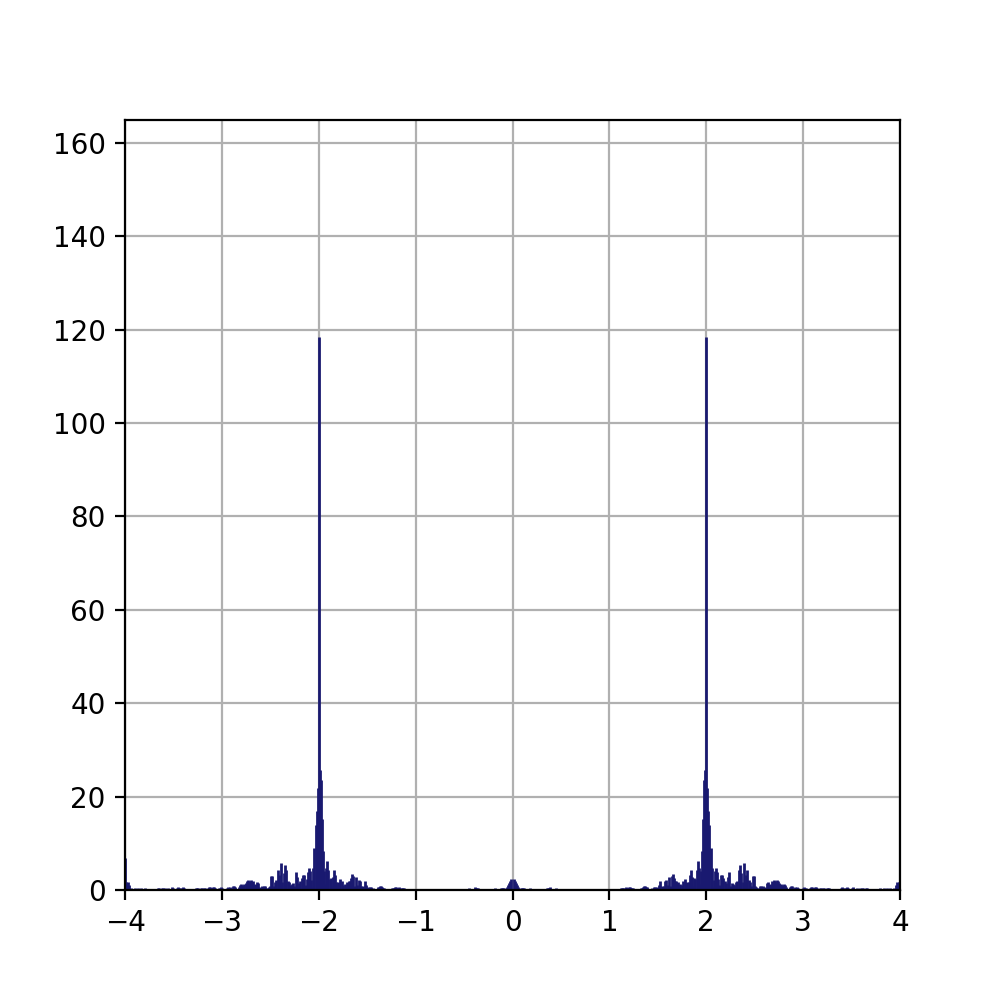

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid()
frequencies_list = []
magnitude_list = []

for i in range (0,4):
    frequencies = np.fft.fftfreq(sample_no, d=1/sampling_rate)
    magnitude_spectrum = np.abs(fft(df[f'probe_{i+1}'].to_numpy()))
    size_diff = frequencies.shape[0] - magnitude_spectrum.shape[0]
    if size_diff > 0:
        frequencies = frequencies[:-size_diff]  
    frequencies_list.append(frequencies)
    magnitude_list.append(magnitude_spectrum)
    
max_magnitude = np.array([np.amax(arr) for arr in magnitude_list]).max()

def update_plot(i):
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(0,max_magnitude)
    ax.grid()
    ax.vlines(frequencies_list[i], 0, magnitude_list[i],  linewidth=1, color = 'midnightblue')

ani = FuncAnimation(fig, update_plot, frames=4, interval=500, repeat=True)

<IPython.core.display.Javascript object>


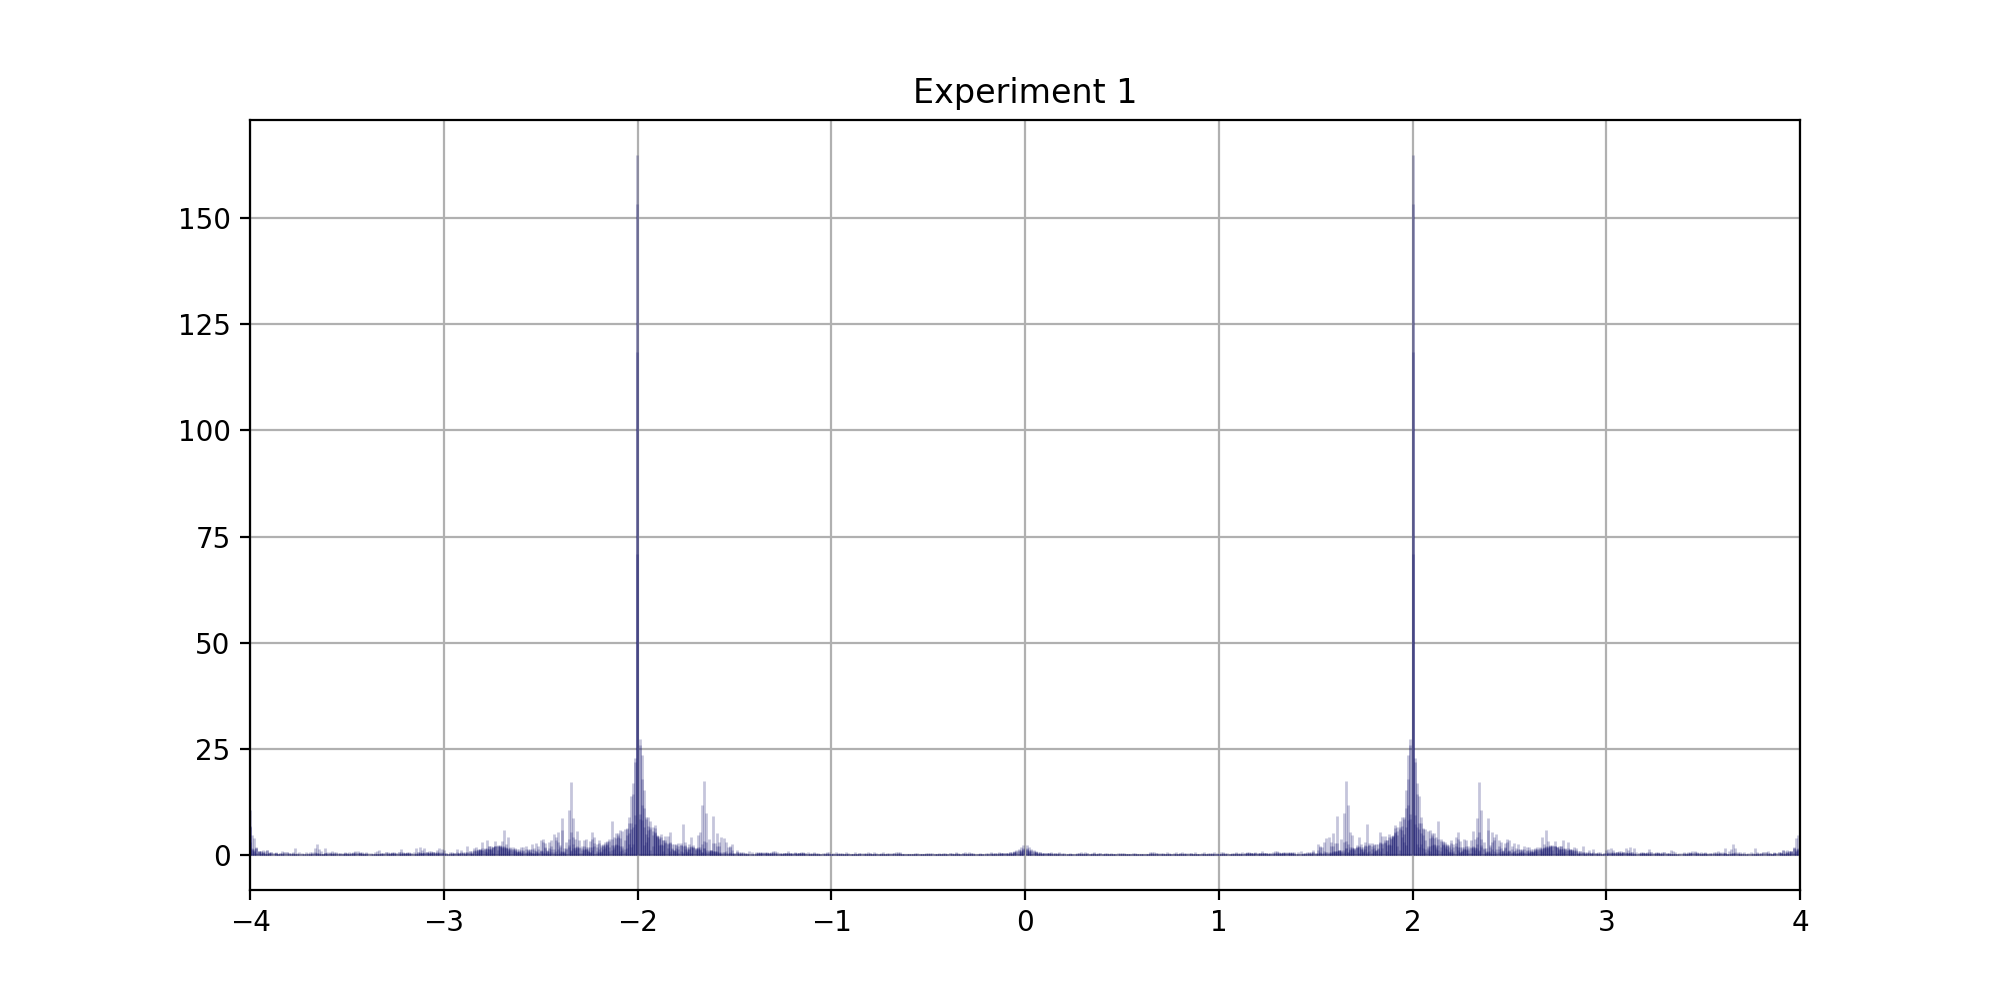

<IPython.core.display.Javascript object>


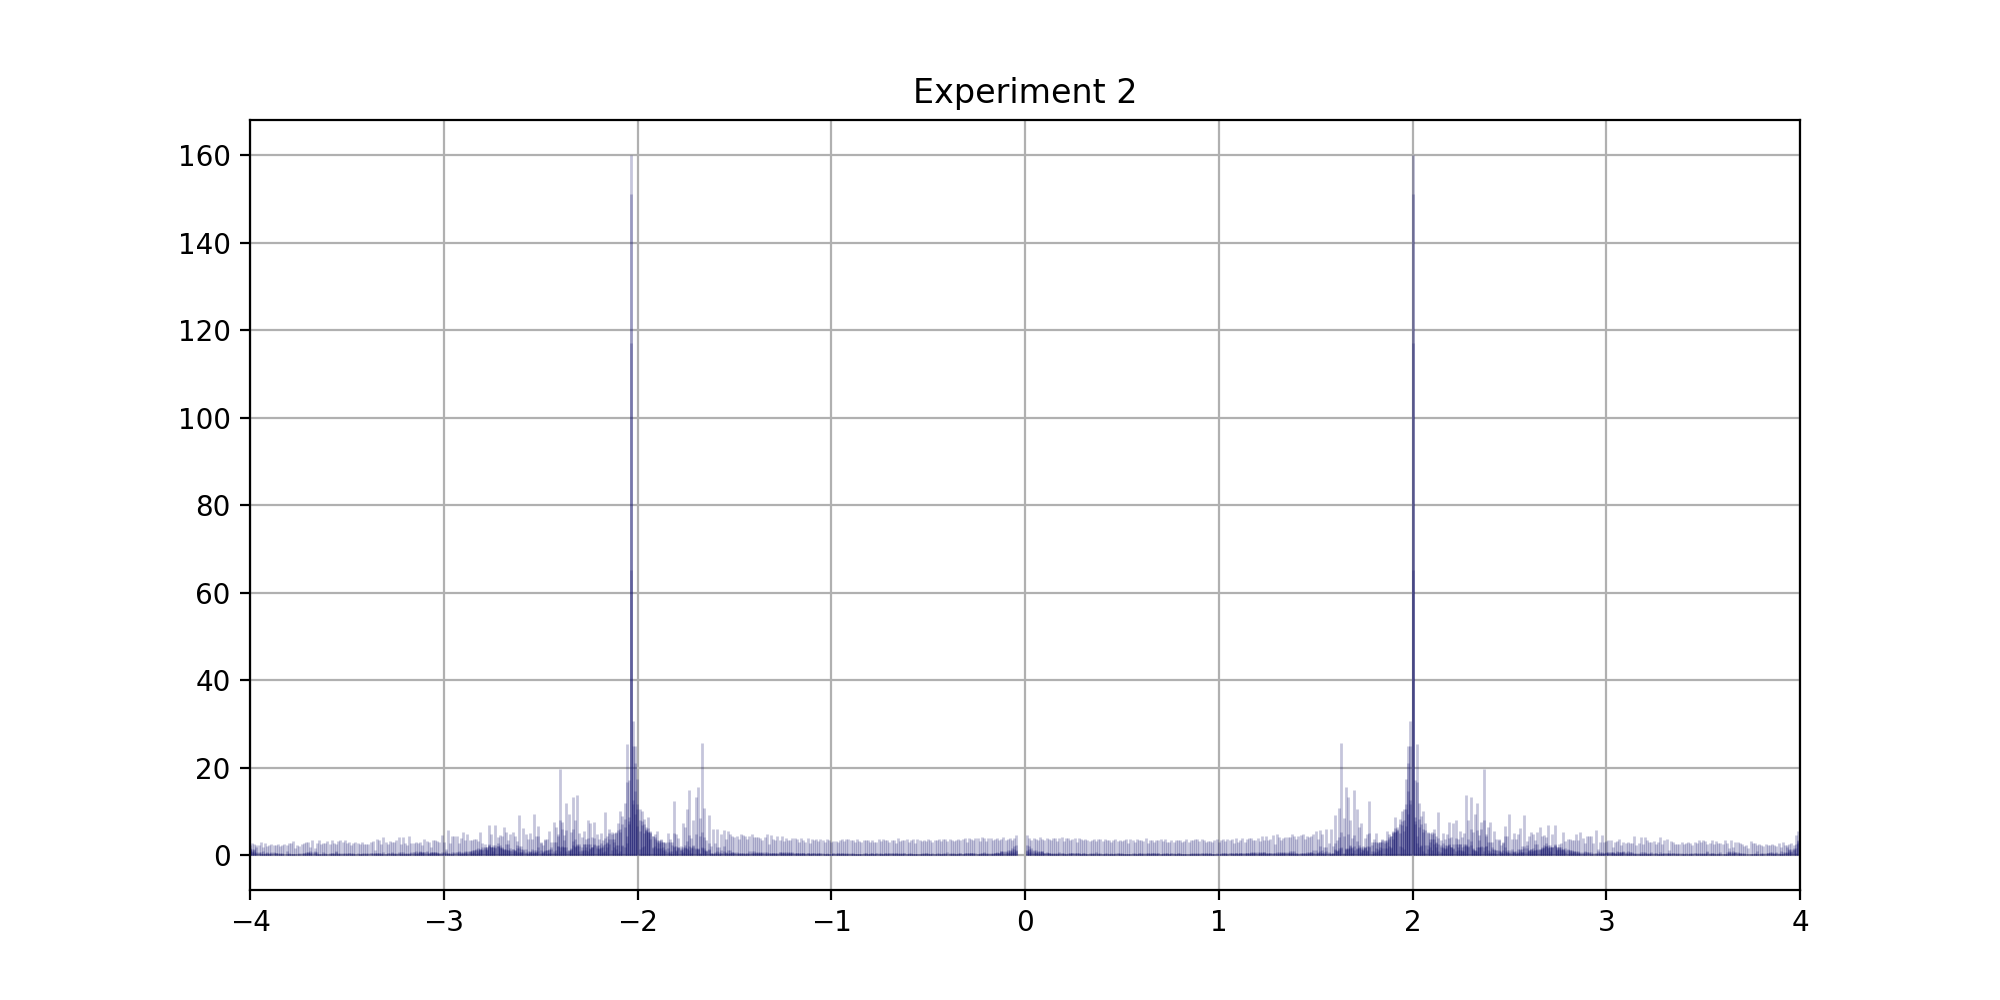

<IPython.core.display.Javascript object>


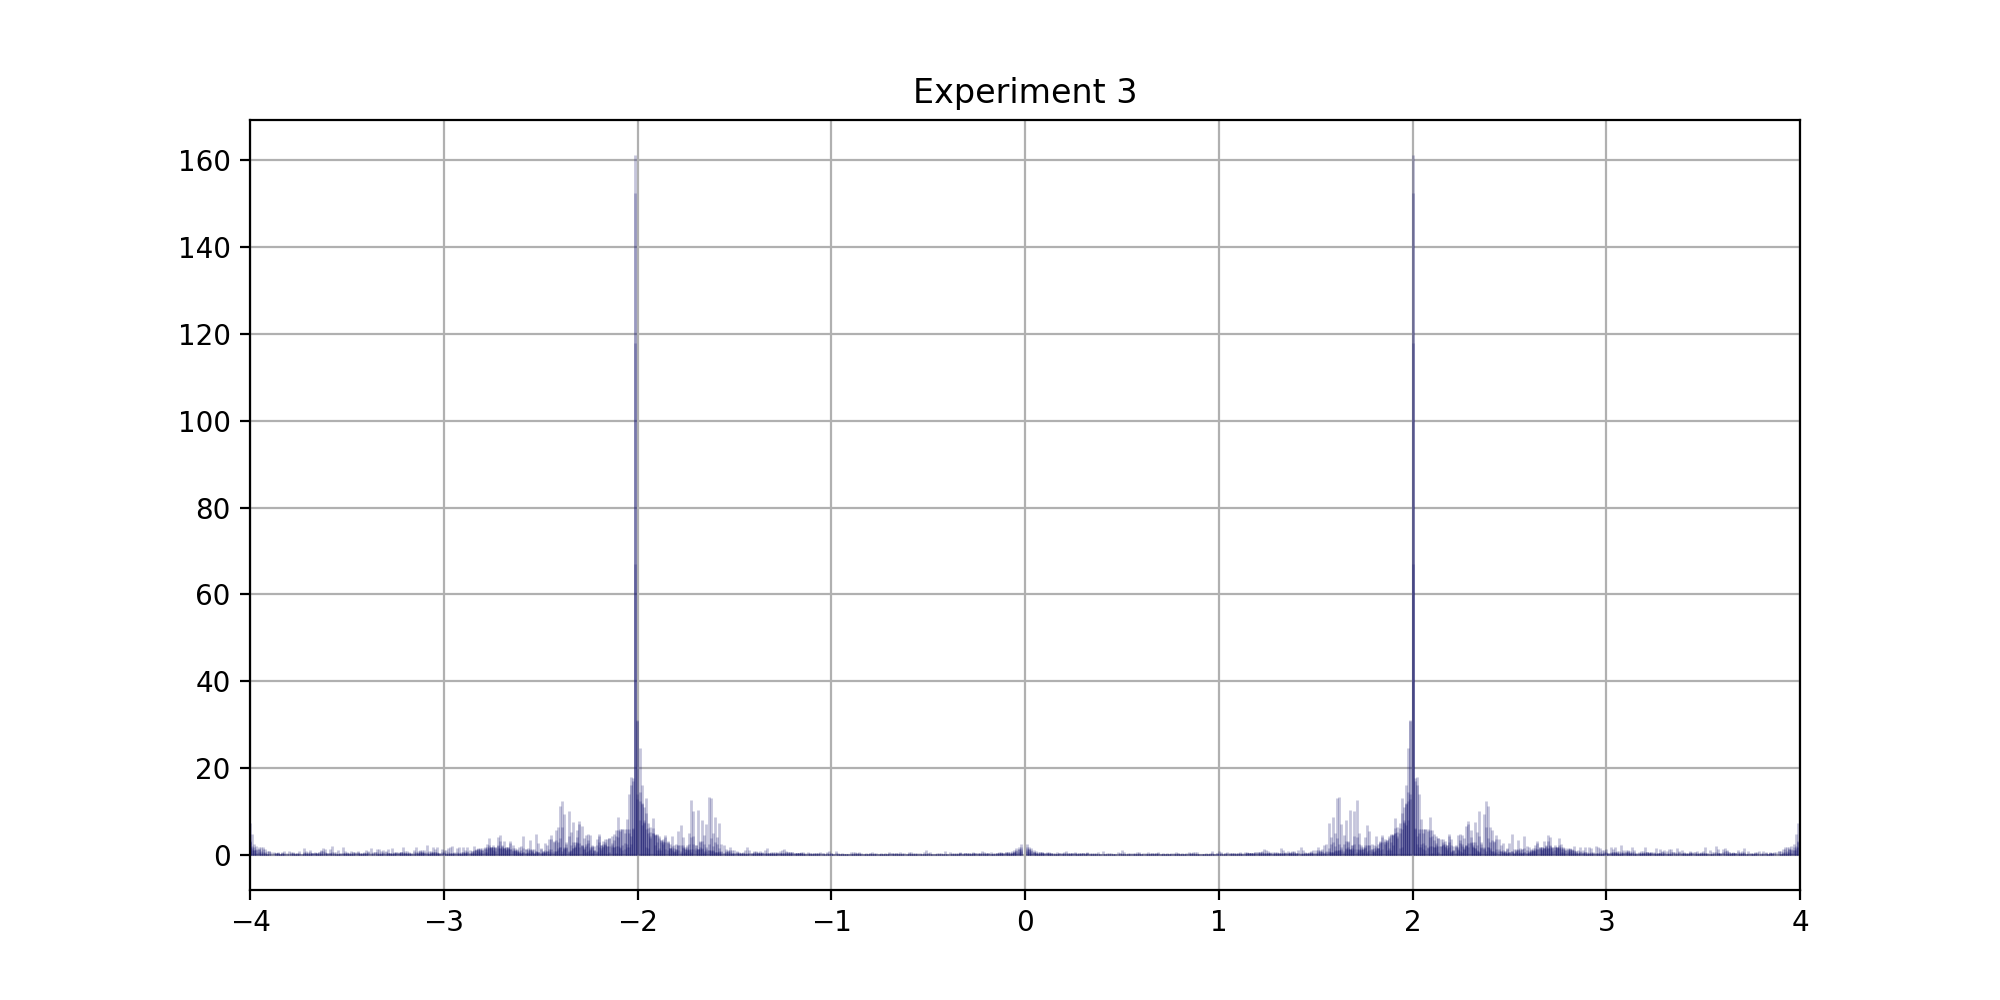

<IPython.core.display.Javascript object>


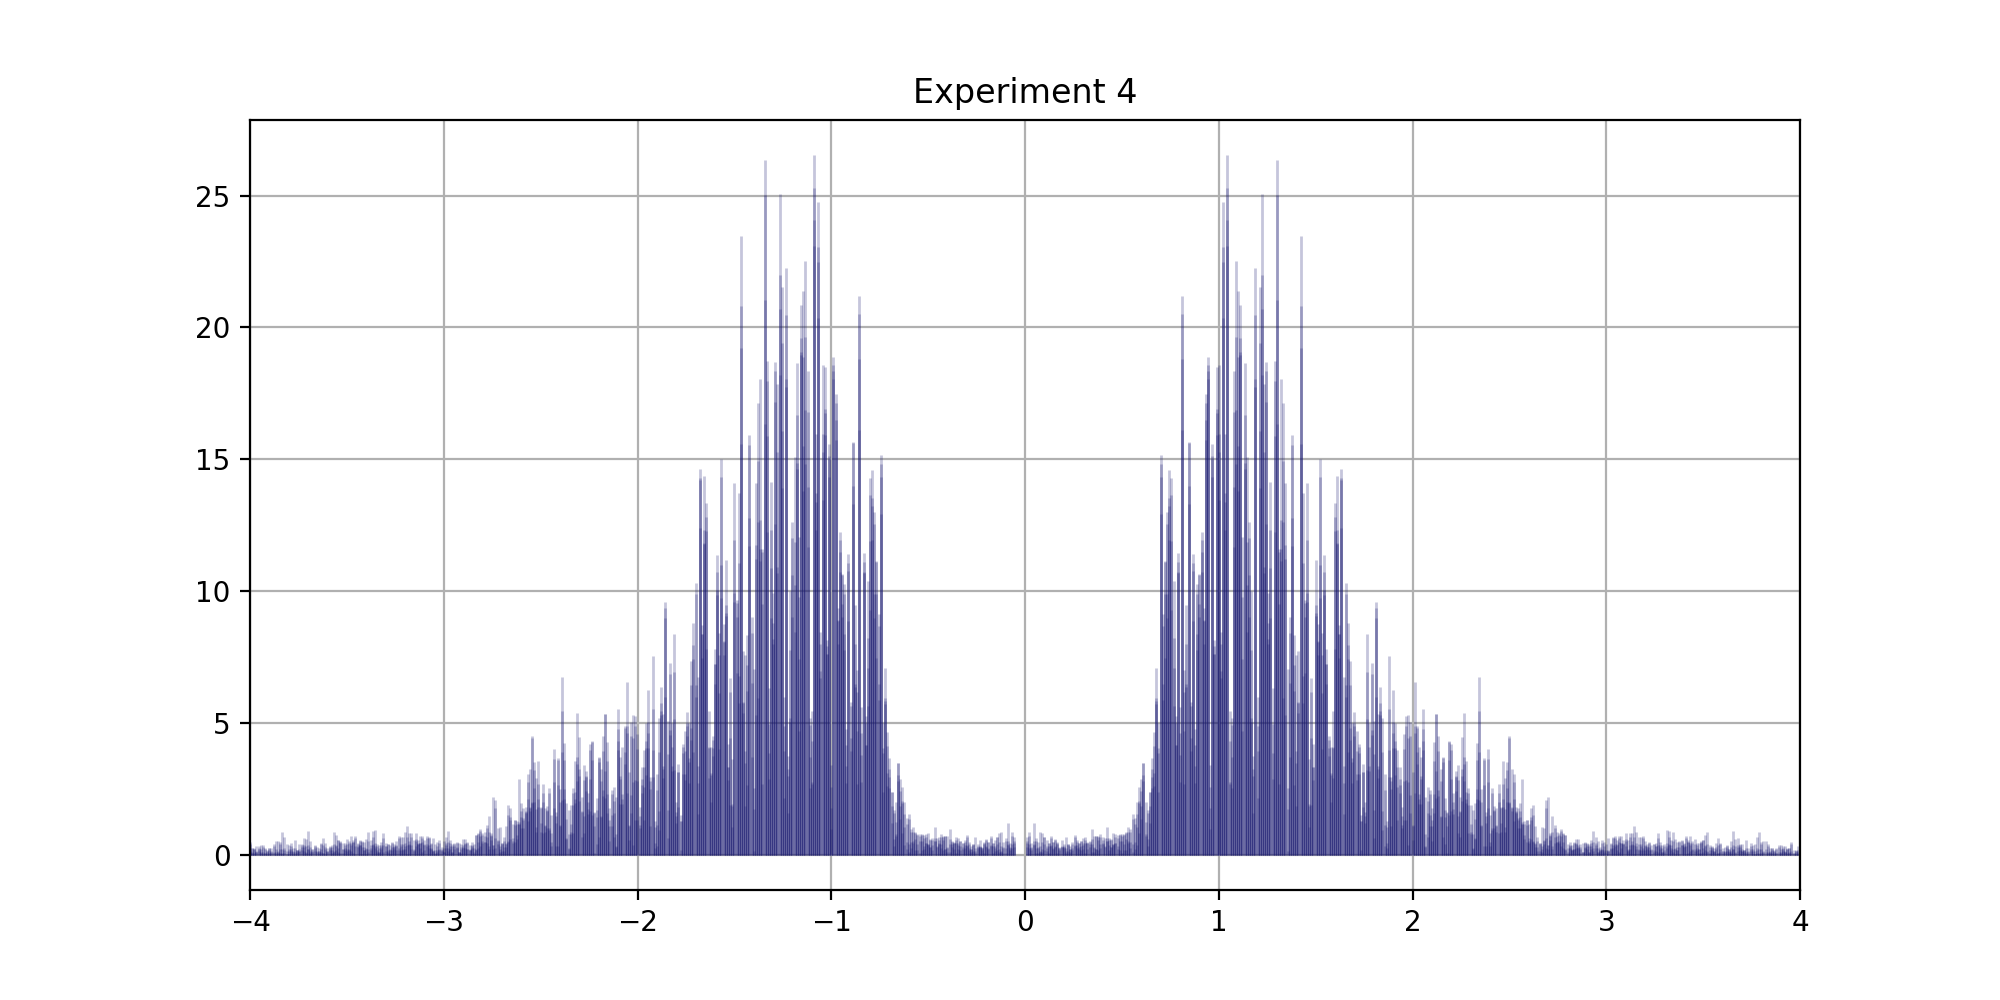

In [5]:
def plot_change_in_frequencies(experiment_no, df):
    fig, ax = plt.subplots(figsize=(10, 5))
    color = 'midnightblue'  
    colors = ['steelblue', 'cornflowerblue', 'midnightblue', 'black']
    ax.grid()
    ax.set_xlim(-4,4)
    for i in range (0,4):
        global sample_no; global sampling_rate
        stem_alpha = 0.25
        frequencies = np.fft.fftfreq(sample_no, d=1/sampling_rate)
        magnitude_spectrum = np.abs(fft(df[f'probe_{i+1}'].to_numpy()))
        size_diff = frequencies.shape[0] - magnitude_spectrum.shape[0]
        if size_diff > 0:
            frequencies = frequencies[:-size_diff]     
        #ax.stem(frequencies, magnitude_spectrum, linefmt=color, markerfmt=' ', use_line_collection = True, alpha=stem_alpha)
        ax.vlines(frequencies, 0, magnitude_spectrum, color=color, linewidth=1, alpha=0.25, label='Stems')
    ax.set_title(f"Experiment {experiment_no + 1}")
    
for i in range(0,4):
    plot_change_in_frequencies(i, df_list[i])